In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import os
import time
import sklearn
from random import random
import numpy as np
import pandas as pd

In [6]:
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [7]:
import json
with open('GA_output_ET.json', 'r') as fp:
    feature_list = json.load(fp)

# MHDis RF

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
cols=feature_list["MHDis"]

In [7]:
loop1='./INPUT/SM/MB-HDis-3.csv'

In [8]:
df = pd.read_csv(loop1,usecols=cols)#,header=None )
df=df.fillna(0)
df=df.sample(n=1000,  random_state=1)
X_train =df[df.columns[0:-1]]
X_train=np.array(X_train)
df[df.columns[-1]] = df[df.columns[-1]].astype('category')
y_train=df[df.columns[-1]].cat.codes  

In [9]:
loop1='./INPUT/SW/Scan-HDis-3.csv' 

In [10]:
df = pd.read_csv(loop1,usecols=cols)#,header=None )
df=df.fillna(0)
df=df.sample(n=1000,  random_state=1)
X_test =df[df.columns[0:-1]]
X_test=np.array(X_test)
df[df.columns[-1]] = df[df.columns[-1]].astype('category')
y_test=df[df.columns[-1]].cat.codes  

In [11]:
features=cols[0:-1]

In [12]:
model =RandomForestClassifier(bootstrap=True,criterion="gini",max_depth=11,max_features=3,min_samples_split=5,n_estimators=75)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=11, max_features=3, min_samples_split=5,
                       n_estimators=75)

In [13]:
explainer = shap.KernelExplainer(model.predict,X_train)

Using 1000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [14]:
shap_values = explainer.shap_values(X_test,nsamples=100)

  0%|          | 0/1000 [00:00<?, ?it/s]

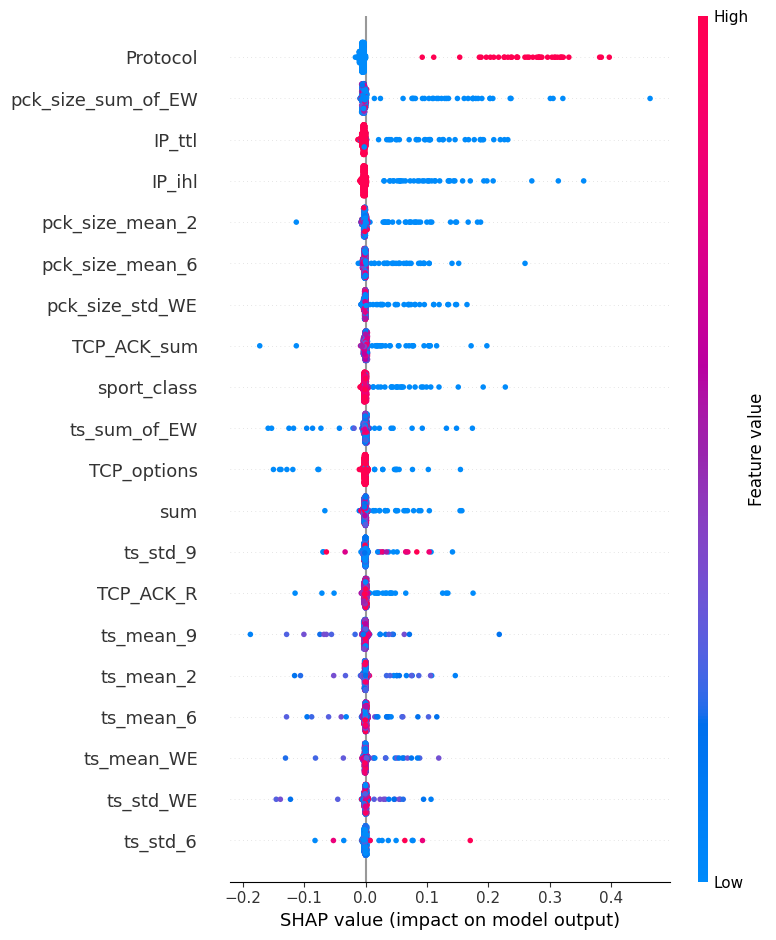

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
shap.summary_plot(shap_values,X_test,feature_names=features, show=False)
plt.savefig(f'F-MHDis-RF.pdf', format='pdf', dpi=1200, bbox_inches='tight')

# MHDis LR

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
cols=feature_list["MHDis"]

In [10]:
loop1='./INPUT/SM/MB-HDis-3.csv'

In [11]:
df = pd.read_csv(loop1,usecols=cols)#,header=None )
df=df.fillna(0)
df=df.sample(n=1000,  random_state=1)
X_train =df[df.columns[0:-1]]
X_train=np.array(X_train)
df[df.columns[-1]] = df[df.columns[-1]].astype('category')
y_train=df[df.columns[-1]].cat.codes  

In [12]:
loop1='./INPUT/SW/Scan-HDis-3.csv' 

In [13]:
df = pd.read_csv(loop1,usecols=cols)#,header=None )
df=df.fillna(0)
df=df.sample(n=1000,  random_state=1)
X_test =df[df.columns[0:-1]]
X_test=np.array(X_test)
df[df.columns[-1]] = df[df.columns[-1]].astype('category')
y_test=df[df.columns[-1]].cat.codes  

In [14]:
features=cols[0:-1]

In [15]:


model = LogisticRegression(C=0.000453162,penalty="none",solver="lbfgs" )
model.fit(X_train,y_train)

LogisticRegression(C=0.000453162, penalty='none')

In [16]:
explainer = shap.KernelExplainer(model.predict,X_train)

Using 1000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [17]:
shap_values = explainer.shap_values(X_test,nsamples=100)

  0%|          | 0/1000 [00:00<?, ?it/s]

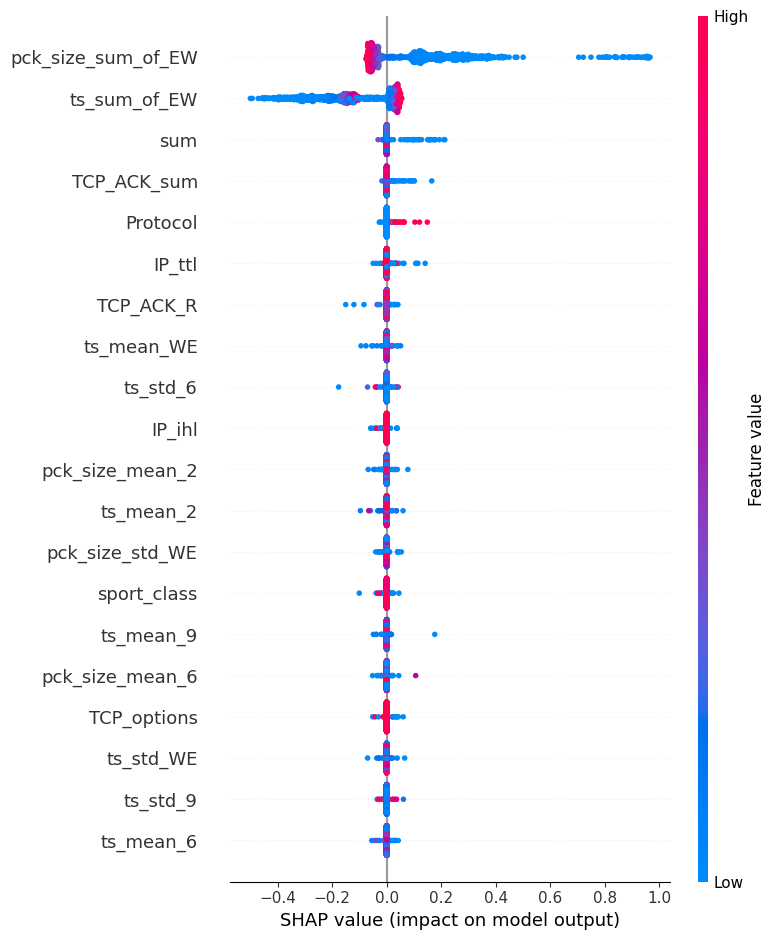

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
shap.summary_plot(shap_values,X_test,feature_names=features, show=False)
plt.savefig(f'F-MHDis-LR.pdf', format='pdf', dpi=1200, bbox_inches='tight')

# OS - LR

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
cols=feature_list["OS"]

In [18]:
loop1= './INPUT/SM/Scan-OS-3.csv'

In [19]:
df = pd.read_csv(loop1,usecols=cols)#,header=None )
df=df.fillna(0)
df=df.sample(n=1000,  random_state=1)
X_train =df[df.columns[0:-1]]
X_train=np.array(X_train)
df[df.columns[-1]] = df[df.columns[-1]].astype('category')
y_train=df[df.columns[-1]].cat.codes  

In [20]:
loop1='./INPUT/TEST/IoT_ENV_[OS_Service_Detection]Google_Home_Mini_SW.csv'

In [21]:
df = pd.read_csv(loop1,usecols=cols)#,header=None )
df=df.fillna(0)
df=df.sample(n=1000,  random_state=1)
X_test =df[df.columns[0:-1]]
X_test=np.array(X_test)
df[df.columns[-1]] = df[df.columns[-1]].astype('category')
y_test=df[df.columns[-1]].cat.codes  

In [22]:
features=cols[0:-1]

In [23]:
model =LogisticRegression(C= 29.4052,penalty="l1",solver="liblinear" )
model.fit(X_train,y_train)

LogisticRegression(C=29.4052, penalty='l1', solver='liblinear')

In [24]:
explainer = shap.KernelExplainer(model.predict,X_train)

Using 1000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [25]:
shap_values = explainer.shap_values(X_test,nsamples=100)

  0%|          | 0/1000 [00:00<?, ?it/s]

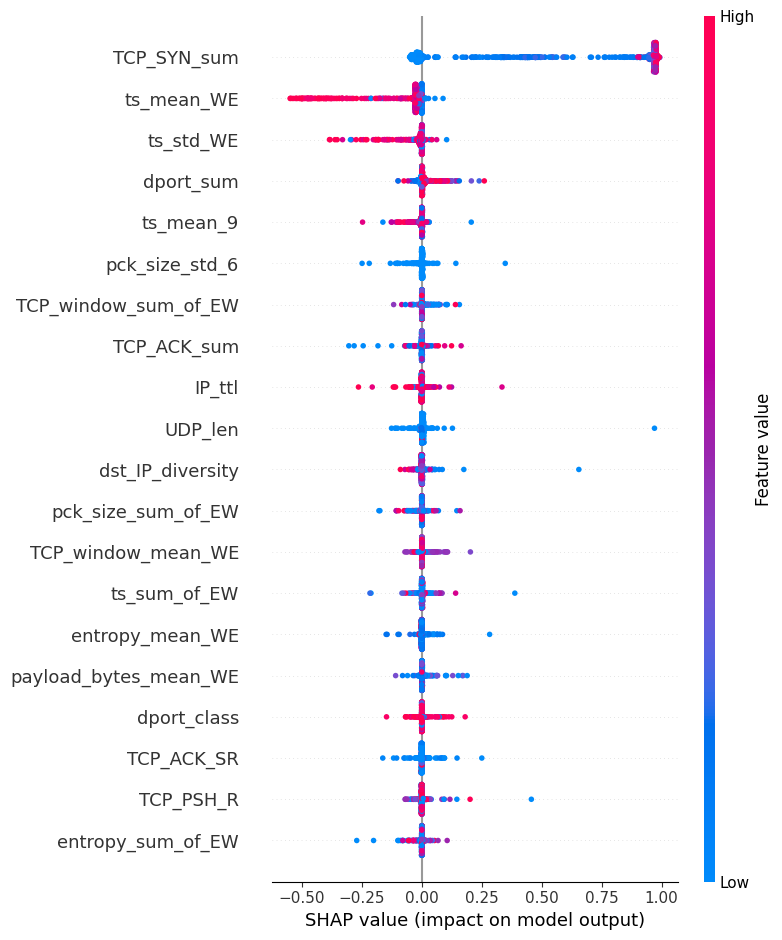

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
shap.summary_plot(shap_values,X_test,feature_names=features, show=False)
plt.savefig(f'F-OS-LR.pdf', format='pdf', dpi=1200, bbox_inches='tight')

# UDP NB

In [ ]:
file_list={'SYN': ['./INPUT/SM/DoS-SYN-1.csv',  './INPUT/TEST/small_Edge_IIoT_DDoS_TCP_SYN_Flood_Attacks_00000_20211124180237._SW.csv'],
 'HTTP': ['./INPUT/SM/MB-HTTP-4.csv',  './INPUT/TEST/NetatmoCamHTTPFlood_1_SW.csv'],
'ACK': ['./INPUT/SM/MB-ACK-4.csv',  './INPUT/TEST/NetatmoCamTCPFlood_3_SW.csv'],
 'UDP': ['./INPUT/SM/MB-UDP-4.csv',  './INPUT/TEST/Bot_IoT_UDP_DDoS_00001._SW.csv'],
 'ARP': ['./INPUT/SM/MitM-ARP-6.csv',   './INPUT/TEST/Kitsune_ARP_MitM._SW.csv'],
 'SP': ['./INPUT/SM/Scan-Port-3.csv', './INPUT/TEST/IoT_ENV_[Port_scan]Google_Home_Mini_SW.csv'],
 'BF': ['./INPUT/SM/MB-BF-5.csv',  './INPUT/TEST/AmcrestCamBruteForce_1_SW.csv'],
 'OS': ['./INPUT/SM/Scan-OS-3.csv',  './INPUT/TEST/IoT_ENV_[OS_Service_Detection]Google_Home_Mini_SW.csv'],
"SCHD":['./INPUT/SM/Scan-HDis-3.csv','./INPUT/SW/MB-HDis-3.csv'],
"MHDis":['./INPUT/SM/MB-HDis-3.csv','./INPUT/SW/Scan-HDis-3.csv' ]}

In [ ]:
"NB":{"SYN":GaussianNB(var_smoothing=1.23285e-09),
"HTTP":GaussianNB(var_smoothing=1e-09 ),                  
"ACK":GaussianNB(var_smoothing= 2.84804e-07),
"UDP":GaussianNB(var_smoothing=1.23285e-09),  
"ARP":GaussianNB(var_smoothing=1.23285e-08),    
"SP":GaussianNB(var_smoothing=1e-09 ),      
"BF":GaussianNB(var_smoothing= 0.053367),  
"OS":GaussianNB(var_smoothing=1e-09 ),
"SCHD":GaussianNB(var_smoothing=0.00432876 ),  
"MHDis":GaussianNB(var_smoothing=1e-09)},

In [9]:
cols=feature_list["UDP"]

In [10]:
loop1='./INPUT/SM/MB-UDP-4.csv'

In [22]:
df = pd.read_csv(loop1,usecols=cols)#,header=None )
df=df.fillna(0)
df=df.sample(n=1000,  random_state=1)
X_train =df[df.columns[0:-1]]
X_train=np.array(X_train)
df[df.columns[-1]] = df[df.columns[-1]].astype('category')
y_train=df[df.columns[-1]].cat.codes  

In [23]:
loop1='./INPUT/TEST/Bot_IoT_UDP_DDoS_00001._SW.csv'

In [24]:
df = pd.read_csv(loop1,usecols=cols)#,header=None )
df=df.fillna(0)
df=df.sample(n=1000,  random_state=1)
X_test =df[df.columns[0:-1]]
X_test=np.array(X_test)
df[df.columns[-1]] = df[df.columns[-1]].astype('category')
y_test=df[df.columns[-1]].cat.codes  

In [25]:
features=cols[0:-1]

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
model =GaussianNB(var_smoothing=1.23285e-09)
model.fit(X_train,y_train)

GaussianNB(var_smoothing=1.23285e-09)

In [28]:
explainer = shap.KernelExplainer(model.predict,X_train)

Using 1000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [29]:
shap_values = explainer.shap_values(X_test,nsamples=100)

  0%|          | 0/1000 [00:00<?, ?it/s]

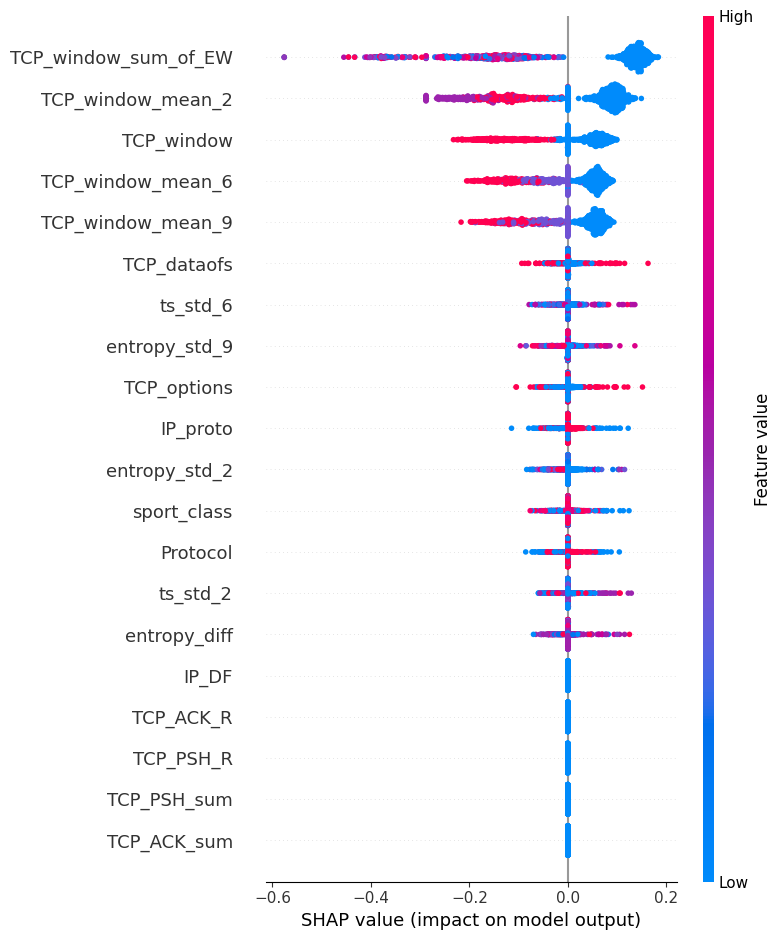

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
shap.summary_plot(shap_values,X_test,feature_names=features, show=False)
plt.savefig(f'F-UDP-NB.pdf', format='pdf', dpi=1200, bbox_inches='tight')